# load core-based statistical areas

In [1]:
!wget https://www2.census.gov/geo/tiger/TIGER2020/CBSA/tl_2020_us_cbsa.zip -O /tmp/tl_2020_us_cbsa.zip
!unzip -o /tmp/tl_2020_us_cbsa.zip -d ~/data/tl_2020_us_cbsa

--2024-02-27 21:12:03--  https://www2.census.gov/geo/tiger/TIGER2020/CBSA/tl_2020_us_cbsa.zip
Resolving www2.census.gov (www2.census.gov)... 23.1.205.135
Connecting to www2.census.gov (www2.census.gov)|23.1.205.135|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘/tmp/tl_2020_us_cbsa.zip’

/tmp/tl_2020_us_cbs     [   <=>              ]  31.60M  60.6MB/s    in 0.5s    

2024-02-27 21:12:04 (60.6 MB/s) - ‘/tmp/tl_2020_us_cbsa.zip’ saved [33140121]

Archive:  /tmp/tl_2020_us_cbsa.zip
 extracting: /Users/me/data/tl_2020_us_cbsa/tl_2020_us_cbsa.cpg  
  inflating: /Users/me/data/tl_2020_us_cbsa/tl_2020_us_cbsa.dbf  
  inflating: /Users/me/data/tl_2020_us_cbsa/tl_2020_us_cbsa.prj  
  inflating: /Users/me/data/tl_2020_us_cbsa/tl_2020_us_cbsa.shp  
  inflating: /Users/me/data/tl_2020_us_cbsa/tl_2020_us_cbsa.shp.ea.iso.xml  
  inflating: /Users/me/data/tl_2020_us_cbsa/tl_2020_us_cbsa.shp.iso.xml  
  inflating: /Users/me/data/tl_2

In [2]:
# Load duckdb, which lets us efficiently load large files
import duckdb

# Load pandas, which lets us manipulate dataframes
import pandas as pd

# Import jupysql Jupyter extension to create SQL cells
%load_ext sql

# Set configrations on jupysql to directly output data to Pandas and to simplify the output that is printed to the notebook.
%config SqlMagic.autopandas = True

%config SqlMagic.feedback = False
%config SqlMagic.displaycon = False

# Allow named parameters (python variables) in SQL cells
%config SqlMagic.named_parameters=True

# Connect jupysql to DuckDB using a SQLAlchemy-style connection string. Either connect to an in memory DuckDB, or a file backed db.
%sql duckdb:///:memory:

Deploy Dash apps for free on Ploomber Cloud! Learn more: https://ploomber.io/s/signup


/Users/me/jaanli/exploring_american_community_survey_data/.venv/lib/python3.11/site-packages/sql/traits.py:20: FutureWarning: named_parameters: boolean values are now deprecated. Value True will be treated as "enabled". 
Please use a valid option: "warn", "enabled", or "disabled". 
For more information, see the docs: https://jupysql.ploomber.io/en/latest/api/configuration.html#named-parameters
  warnings.warn(


In [3]:
%%sql 
LOAD spatial;

,Success


In [5]:
%%sql 
SELECT * FROM '~/data/tl_2020_us_cbsa/tl_2020_us_cbsa.shp'

,CSAFP,CBSAFP,GEOID,NAME,NAMELSAD,LSAD,MEMI,MTFCC,ALAND,AWATER,INTPTLAT,INTPTLON,geom
0,122,12020,12020,"Athens-Clarke County, GA","Athens-Clarke County, GA Metro Area",M1,1,G3110,2654607902,26109459,+33.9439840,-083.2138965,"[2, 4, 208, 0, 0, 0, 0, 0, 72, 75, 167, 194, 1..."
1,122,12060,12060,"Atlanta-Sandy Springs-Alpharetta, GA","Atlanta-Sandy Springs-Alpharetta, GA Metro Area",M1,1,G3110,22495780629,386874693,+33.6937280,-084.3999113,"[2, 4, 229, 0, 0, 0, 0, 0, 238, 197, 170, 194,..."
2,428,12100,12100,"Atlantic City-Hammonton, NJ","Atlantic City-Hammonton, NJ Metro Area",M1,1,G3110,1438774368,301270979,+39.4693555,-074.6337591,"[2, 4, 73, 0, 0, 0, 0, 0, 118, 248, 149, 194, ..."
3,426,12120,12120,"Atmore, AL","Atmore, AL Micro Area",M2,2,G3110,2448595161,20024887,+31.1222867,-087.1684097,"[2, 4, 116, 0, 0, 0, 0, 0, 111, 59, 175, 194, ..."
4,258,12140,12140,"Auburn, IN","Auburn, IN Micro Area",M2,2,G3110,939731962,2657419,+41.3967596,-085.0026969,"[2, 4, 118, 0, 0, 0, 0, 0, 95, 99, 170, 194, 1..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
934,None,49080,49080,"Winnemucca, NV","Winnemucca, NV Micro Area",M2,2,G3110,24969535443,44194837,+41.4079136,-118.1275915,"[2, 4, 209, 0, 0, 0, 0, 0, 176, 169, 238, 194,..."
935,None,49100,49100,"Winona, MN","Winona, MN Micro Area",M2,2,G3110,1621791140,40051870,+43.9813526,-091.7770438,"[2, 4, 130, 0, 0, 0, 0, 0, 180, 40, 184, 194, ..."
936,268,49180,49180,"Winston-Salem, NC","Winston-Salem, NC Metro Area",M1,1,G3110,5203324601,81533467,+36.0788515,-080.3450642,"[2, 4, 60, 0, 0, 0, 0, 0, 96, 195, 161, 194, 6..."
937,554,49220,49220,"Wisconsin Rapids-Marshfield, WI","Wisconsin Rapids-Marshfield, WI Micro Area",M2,2,G3110,2053959984,41993013,+44.4614126,-090.0388252,"[2, 4, 53, 0, 0, 0, 0, 0, 214, 162, 180, 194, ..."


In [6]:
import geopandas as gpd
gdf = gpd.read_file('~/data/tl_2020_us_cbsa/tl_2020_us_cbsa.shp')

In [12]:
gdf[gdf['NAME'].str.contains('New York')]

,CSAFP,CBSAFP,GEOID,NAME,NAMELSAD,LSAD,MEMI,MTFCC,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
620,408,35620,35620,"New York-Newark-Jersey City, NY-NJ-PA","New York-Newark-Jersey City, NY-NJ-PA Metro Area",M1,1,G3110,17312262984,6546379453,+40.7749300,-073.8737580,"POLYGON ((-74.88982 40.78773, -74.88971 40.787..."


<Axes: >

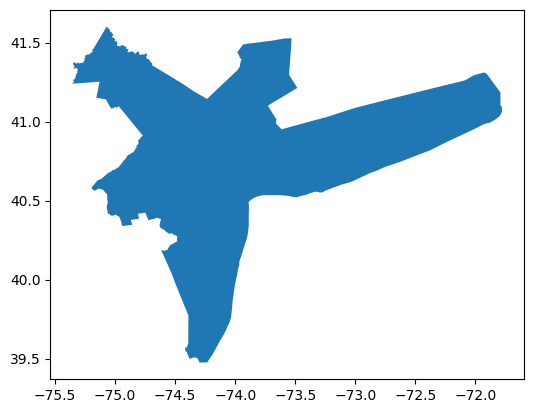

In [16]:
gdf[gdf['NAME'].str.contains('New York')].geometry.plot()

# load puma shapefiles

In [18]:
shapefile_path = "~/data/american_community_survey/2020_census_microdata_tiger_shapefile.shp"
puma_shapes = gpd.read_file(shapefile_path)

In [19]:
puma_shapes

,STATEFP20,PUMACE20,GEOID20,NAMELSAD20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry
0,11,00101,1100101,District of Columbia (West) PUMA,G6120,S,36640727,2297099,+38.9377578,-077.0732363,"POLYGON ((-77.05763 38.89270, -77.05893 38.892..."
1,11,00102,1100102,District of Columbia (North) PUMA,G6120,S,28506819,106920,+38.9527635,-077.0147008,"POLYGON ((-76.96387 38.93500, -76.96582 38.934..."
2,11,00103,1100103,District of Columbia (Northeast) PUMA,G6120,S,23178841,1025424,+38.9048507,-076.9808699,"POLYGON ((-76.97816 38.87680, -76.98396 38.874..."
3,11,00104,1100104,District of Columbia (East) PUMA,G6120,S,33032989,944520,+38.8722479,-076.9627387,"POLYGON ((-76.94992 38.86128, -76.95001 38.861..."
4,11,00105,1100105,District of Columbia (Central) PUMA,G6120,S,8518845,182814,+38.9231033,-077.0308935,"POLYGON ((-77.03090 38.90964, -77.03108 38.909..."
...,...,...,...,...,...,...,...,...,...,...,...
2482,48,02700,4802700,"West Central Texas COG--Taylor County, Abilene...",G6120,S,2371228265,9760311,+32.2971255,-099.8904299,"POLYGON ((-99.69544 32.08190, -99.69545 32.081..."
2483,48,02005,4802005,Denton County (Central)--Denton (Central) & Co...,G6120,S,119323924,623117,+33.1943770,-097.1288615,"POLYGON ((-97.11243 33.25395, -97.11233 33.254..."
2484,48,01800,4801800,East Texas COG (Southwest)--Henderson & Anders...,G6120,S,5015247217,233198749,+32.0119634,-095.7608074,"POLYGON ((-95.46214 32.12872, -95.46204 32.128..."
2485,48,01501,4801501,East Texas COG (Central)--Smith County (Outsid...,G6120,S,2102461367,68129019,+32.3823022,-095.2613479,"POLYGON ((-94.98588 32.35038, -94.98587 32.348..."


In [25]:
%%sql 
WITH acs_microdata AS (
  SELECT * FROM '~/data/american_community_survey/2020_census_microdata_tiger_shapefile.shp'
),
us_cbsa AS (
  SELECT * FROM '~/data/tl_2020_us_cbsa/tl_2020_us_cbsa.shp'
),
new_york_cbsa AS (
  SELECT * FROM us_cbsa
  WHERE NAMELSAD LIKE '%New York%'
),
intersecting_rows AS (
  SELECT acs.*
  FROM acs_microdata acs
  JOIN new_york_cbsa nyc
  ON ST_Intersects(acs.geom, nyc.geom)
)
SELECT * FROM intersecting_rows;


,STATEFP20,PUMACE20,GEOID20,NAMELSAD20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geom
0,36,02804,3602804,Dutchess County (Southwest)--Fishkill & Wappin...,G6120,S,240325417,24525886,+41.5941970,-073.9134134,"[2, 4, 63, 0, 0, 0, 0, 0, 16, 0, 148, 194, 112..."
1,36,02701,3602701,Sullivan & Ulster (West) Counties PUMA,G6120,S,4195598841,103398369,+41.8093993,-074.6217631,"[2, 4, 184, 0, 0, 0, 0, 0, 28, 74, 150, 194, 1..."
2,36,02901,3602901,Orange County (Northeast)--Greater Newburgh Ci...,G6120,S,420131440,26776009,+41.5074504,-074.0987065,"[2, 4, 125, 0, 0, 0, 0, 0, 176, 155, 148, 194,..."
3,36,02805,3602805,Putnam County & Southern Dutchess County PUMA,G6120,S,856544186,46595094,+41.4576193,-073.7246077,"[2, 4, 69, 0, 0, 0, 0, 0, 15, 247, 147, 194, 1..."
4,09,20904,0920904,Western North PUMA,G6120,S,664457917,35252911,+41.4839832,-073.4066188,"[2, 4, 64, 0, 0, 0, 0, 0, 86, 22, 147, 194, 25..."
...,...,...,...,...,...,...,...,...,...,...,...
164,34,01204,3401204,Ocean County (Northwest) PUMA,G6120,S,571412693,7646932,+40.0414307,-074.3841920,"[2, 4, 230, 0, 0, 0, 0, 0, 49, 27, 149, 194, 1..."
165,34,01202,3401202,Ocean County (Central)--Toms River & Berkeley ...,G6120,S,234280400,80165247,+39.9399652,-074.1680549,"[2, 4, 105, 0, 0, 0, 0, 0, 199, 168, 148, 194,..."
166,34,02003,3402003,Burlington County (South & East) PUMA,G6120,S,1611409133,32099527,+39.8457997,-074.6047072,"[2, 4, 97, 0, 0, 0, 0, 0, 175, 190, 149, 194, ..."
167,34,01201,3401201,Ocean County (South) PUMA,G6120,S,672829856,624978348,+39.7348923,-074.2234753,"[2, 4, 213, 0, 0, 0, 0, 0, 83, 222, 148, 194, ..."


In [35]:
%%sql 
COPY(
WITH acs_microdata AS (
  SELECT * FROM '~/data/american_community_survey/2020_census_microdata_tiger_shapefile.shp'
),
us_cbsa AS (
  SELECT * FROM '~/data/tl_2020_us_cbsa/tl_2020_us_cbsa.shp'
),
new_york_cbsa AS (
  SELECT * FROM us_cbsa
  WHERE NAMELSAD LIKE '%New York%'
),
intersecting_rows AS (
  SELECT acs.*
  FROM acs_microdata acs
  JOIN new_york_cbsa nyc
  ON ST_Intersects(acs.geom, nyc.geom)
)
SELECT * FROM intersecting_rows
) TO '~/data/newyork_newark_cbsa_pumas.shp';


,Success


In [27]:
%%sql
SELECT * FROM '~/data/overlap.shp'

RuntimeError: (duckdb.duckdb.IOException) IO Error: GDAL Error (4): `~/data/overlap.shp' not recognized as a supported file format.
[SQL: SELECT * FROM '~/data/overlap.shp']
(Background on this error at: https://sqlalche.me/e/20/e3q8)
If you need help solving this issue, send us a message: https://ploomber.io/community


In [33]:
%%sql 
COPY(SELECT * FROM '~/data/tl_2020_us_cbsa/tl_2020_us_cbsa.shp') TO '~/data/cbsa.shp' WITH (FORMAT GDAL, DRIVER 'ESRI Shapefile');

,Success


In [34]:
%%sql 
SELECT * FROM '~/data/cbsa.shp'

,CSAFP,CBSAFP,GEOID,NAME,NAMELSAD,LSAD,MEMI,MTFCC,ALAND,AWATER,INTPTLAT,INTPTLON,geom
0,122,12020,12020,"Athens-Clarke County, GA","Athens-Clarke County, GA Metro Area",M1,1,G3110,2654607902,26109459,+33.9439840,-083.2138965,"[2, 4, 208, 0, 0, 0, 0, 0, 72, 75, 167, 194, 1..."
1,122,12060,12060,"Atlanta-Sandy Springs-Alpharetta, GA","Atlanta-Sandy Springs-Alpharetta, GA Metro Area",M1,1,G3110,22495780629,386874693,+33.6937280,-084.3999113,"[2, 4, 229, 0, 0, 0, 0, 0, 238, 197, 170, 194,..."
2,428,12100,12100,"Atlantic City-Hammonton, NJ","Atlantic City-Hammonton, NJ Metro Area",M1,1,G3110,1438774368,301270979,+39.4693555,-074.6337591,"[2, 4, 73, 0, 0, 0, 0, 0, 118, 248, 149, 194, ..."
3,426,12120,12120,"Atmore, AL","Atmore, AL Micro Area",M2,2,G3110,2448595161,20024887,+31.1222867,-087.1684097,"[2, 4, 116, 0, 0, 0, 0, 0, 111, 59, 175, 194, ..."
4,258,12140,12140,"Auburn, IN","Auburn, IN Micro Area",M2,2,G3110,939731962,2657419,+41.3967596,-085.0026969,"[2, 4, 118, 0, 0, 0, 0, 0, 95, 99, 170, 194, 1..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
934,None,49080,49080,"Winnemucca, NV","Winnemucca, NV Micro Area",M2,2,G3110,24969535443,44194837,+41.4079136,-118.1275915,"[2, 4, 209, 0, 0, 0, 0, 0, 176, 169, 238, 194,..."
935,None,49100,49100,"Winona, MN","Winona, MN Micro Area",M2,2,G3110,1621791140,40051870,+43.9813526,-091.7770438,"[2, 4, 130, 0, 0, 0, 0, 0, 180, 40, 184, 194, ..."
936,268,49180,49180,"Winston-Salem, NC","Winston-Salem, NC Metro Area",M1,1,G3110,5203324601,81533467,+36.0788515,-080.3450642,"[2, 4, 60, 0, 0, 0, 0, 0, 96, 195, 161, 194, 6..."
937,554,49220,49220,"Wisconsin Rapids-Marshfield, WI","Wisconsin Rapids-Marshfield, WI Micro Area",M2,2,G3110,2053959984,41993013,+44.4614126,-090.0388252,"[2, 4, 53, 0, 0, 0, 0, 0, 214, 162, 180, 194, ..."
